In [3]:
import numpy as np 
import pandas as pd 

In [4]:
# Read the training data
train_df = pd.read_csv('train.csv')
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**To See if there are missing values in the training data**

In [5]:
missing_data = train_df.isnull()
missing_data.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   

PassengerId
False    8693
Name: PassengerId, dtype: int64

HomePlanet
False    8492
True      201
Name: HomePlanet, dtype: int64

CryoSleep
False    8476
True      217
Name: CryoSleep, dtype: int64

Cabin
False    8494
True      199
Name: Cabin, dtype: int64

Destination
False    8511
True      182
Name: Destination, dtype: int64

Age
False    8514
True      179
Name: Age, dtype: int64

VIP
False    8490
True      203
Name: VIP, dtype: int64

RoomService
False    8512
True      181
Name: RoomService, dtype: int64

FoodCourt
False    8510
True      183
Name: FoodCourt, dtype: int64

ShoppingMall
False    8485
True      208
Name: ShoppingMall, dtype: int64

Spa
False    8510
True      183
Name: Spa, dtype: int64

VRDeck
False    8505
True      188
Name: VRDeck, dtype: int64

Name
False    8493
True      200
Name: Name, dtype: int64

Transported
False    8693
Name: Transported, dtype: int64



In [7]:
# Replace the missing values with the maximum frequent value in categorical variables

max_hom_p = train_df['HomePlanet'].value_counts().idxmax()
max_cry = train_df['CryoSleep'].value_counts().idxmax()
max_cab = train_df['Cabin'].value_counts().idxmax()
max_dest = train_df['Destination'].value_counts().idxmax()
max_vip = train_df['VIP'].value_counts().idxmax()
train_df["HomePlanet"].replace(np.nan, max_hom_p , inplace=True)
train_df["CryoSleep"].replace(np.nan, max_cry, inplace=True)
train_df["Cabin"].replace(np.nan, max_cab , inplace=True)
train_df["Destination"].replace(np.nan, max_dest , inplace=True)
train_df["VIP"].replace(np.nan, max_vip , inplace=True)


In [8]:
# Replace the missing values with the mean value in continious variables

train_df['Age'].replace(np.nan, train_df['Age'].mean(), inplace=True)
train_df['RoomService'].replace(np.nan, train_df['RoomService'].mean(), inplace=True)
train_df['FoodCourt'].replace(np.nan, train_df['FoodCourt'].mean(), inplace=True)
train_df['ShoppingMall'].replace(np.nan, train_df['ShoppingMall'].mean(), inplace=True)
train_df['Spa'].replace(np.nan, train_df['Spa'].mean(), inplace=True)
train_df['VRDeck'].replace(np.nan, train_df['VRDeck'].mean(), inplace=True)


In [9]:
# Check if correct data format are used
train_df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep          bool
Cabin            object
Destination      object
Age             float64
VIP                bool
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [10]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the numerical variables 
# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

train_df[numerical] = scaler.fit_transform(train_df[numerical])

# Show an example of a record with scaling applied
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,0.493671,False,0.000000,0.000000,0.000000,0.000000,0.000000,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,0.303797,False,0.007608,0.000302,0.001064,0.024500,0.001823,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,0.734177,True,0.003001,0.119948,0.000000,0.299670,0.002030,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,0.417722,False,0.000000,0.043035,0.015793,0.148563,0.007997,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,0.202532,False,0.021149,0.002348,0.006428,0.025214,0.000083,Willy Santantines,True


In [11]:
from sklearn import preprocessing

# Hot Encoding for the categorical variables
le = preprocessing.LabelEncoder()
categorical = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']
train_df_transform = train_df
train_df_transform['HomePlanet'] = le.fit_transform(train_df_transform['HomePlanet'])
train_df_transform['Destination'] = le.fit_transform(train_df_transform['Destination'])
train_df_transform['VIP'] = le.fit_transform(train_df_transform['VIP'])
train_df_transform['CryoSleep'] = le.fit_transform(train_df_transform['CryoSleep'])
train_df_transform['Cabin'] = le.fit_transform(train_df_transform['Cabin'])
train_df_transform['Transported'] = le.fit_transform(train_df_transform['Transported'])


train_df_transform.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,1,0,149,2,0.493671,0,0.000000,0.000000,0.000000,0.000000,0.000000,Maham Ofracculy,0
1,0002_01,0,0,2184,2,0.303797,0,0.007608,0.000302,0.001064,0.024500,0.001823,Juanna Vines,1
2,0003_01,1,0,1,2,0.734177,1,0.003001,0.119948,0.000000,0.299670,0.002030,Altark Susent,0
3,0003_02,1,0,1,2,0.417722,0,0.000000,0.043035,0.015793,0.148563,0.007997,Solam Susent,0
4,0004_01,0,0,2186,2,0.202532,0,0.021149,0.002348,0.006428,0.025214,0.000083,Willy Santantines,1


**Exploration of the variable distributions and some EDA between all variables and transported variable**

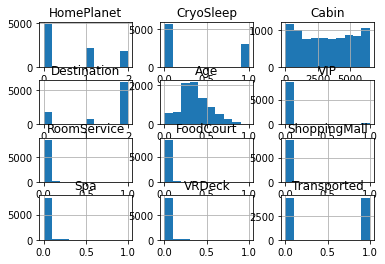

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
train_df_transform.hist()
plt.show()


<AxesSubplot:xlabel='HomePlanet', ylabel='Transported'>

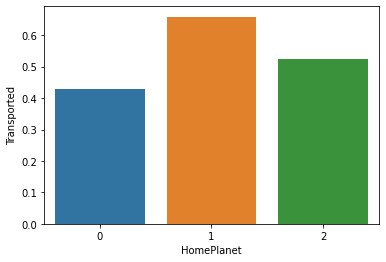

In [19]:
sns.barplot(x='HomePlanet', y='Transported', data=train_df_transform, ci=None)


<AxesSubplot:xlabel='Destination', ylabel='Transported'>

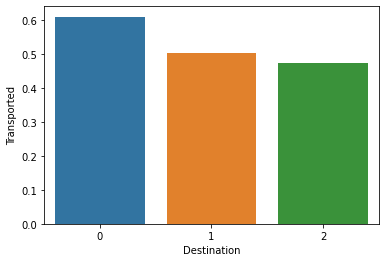

In [20]:
sns.barplot(x='Destination', y='Transported', data=train_df_transform, ci=None)


<AxesSubplot:xlabel='CryoSleep', ylabel='Transported'>

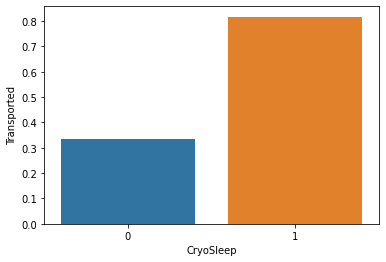

In [21]:
sns.barplot(x='CryoSleep', y='Transported', data=train_df_transform, ci=None)


<AxesSubplot:xlabel='VIP', ylabel='Transported'>

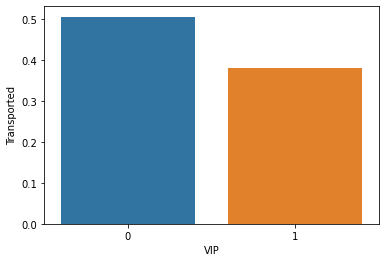

In [22]:
sns.barplot(x='VIP', y='Transported', data=train_df_transform, ci=None)


In [23]:
import scipy

# Analysis the relationship between the categorical variables and the transported variables using Chi sqaure test
ct_table_home=pd.crosstab(train_df_transform["HomePlanet"],train_df_transform["Transported"])
chi2_stat_h, p_h, dof_h, expected_h = scipy.stats.chi2_contingency(ct_table_home)
ct_table_dest=pd.crosstab(train_df_transform["Destination"],train_df_transform["Transported"])
chi2_stat_d, p_d, dof_d, expected_d = scipy.stats.chi2_contingency(ct_table_dest)
ct_table_cryo=pd.crosstab(train_df_transform["CryoSleep"],train_df_transform["Transported"])
chi2_stat_c, p_c, dof_c, expected_c = scipy.stats.chi2_contingency(ct_table_cryo)
ct_table_vip=pd.crosstab(train_df_transform["VIP"],train_df_transform["Transported"])
chi2_stat_v, p_v, dof_v, expected_v = scipy.stats.chi2_contingency(ct_table_vip)
print(f"p-value for HomePlanet:            {p_h:.5g}")
print(f"p-value for Destination:            {p_d:.5g}")
print(f"p-value for CryoSleep:            {p_c:.5g}")
print(f"p-value for VIP:            {p_v:.5g}")
print(f"chi2 statistic_cryo:     {chi2_stat_c:.5g}")
print(f"degrees of freedom_cryo: {dof_c}")
print("expected frequencies cryo:\n",expected_c)



p-value for HomePlanet:            5.5496e-70
p-value for Destination:            1.1948e-23
p-value for CryoSleep:            0
p-value for VIP:            0.0006681
chi2 statistic_cryo:     1838.6
degrees of freedom_cryo: 1
expected frequencies cryo:
 [[2807.50488899 2848.49511101]
 [1507.49511101 1529.50488899]]


In [24]:
from scipy.stats import shapiro

# Check the normality of the numerical variables to choose the correct test for anlysis
n_age = shapiro(train_df_transform["Age"])
n_spa = shapiro(train_df_transform["Spa"])
n_vrdeck = shapiro(train_df_transform["VRDeck"])
n_fcourt = shapiro(train_df_transform["FoodCourt"])
n_rserv = shapiro(train_df_transform["RoomService"])
n_shmall = shapiro(train_df_transform["ShoppingMall"])
print(f"n_age_p           {n_age}")
print(f"n_spa_p:            {n_spa}")
print(f"n_vrdeck_p:            {n_vrdeck}")
print(f"n_fcourt_p:            {n_fcourt}")
print(f"n_rserv_p:            {n_rserv}")
print(f"n_shmall_p:            {n_shmall}")


n_age_p           ShapiroResult(statistic=0.9806526899337769, pvalue=9.781874770999727e-33)
n_spa_p:            ShapiroResult(statistic=0.2918644845485687, pvalue=0.0)
n_vrdeck_p:            ShapiroResult(statistic=0.28196820616722107, pvalue=0.0)
n_fcourt_p:            ShapiroResult(statistic=0.3096773624420166, pvalue=0.0)
n_rserv_p:            ShapiroResult(statistic=0.37844032049179077, pvalue=0.0)
n_shmall_p:            ShapiroResult(statistic=0.2970142066478729, pvalue=0.0)


c:\users\abdo\appdata\local\programs\python\python39-32\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [25]:
train_df2= train_df_transform[['Age','Spa','VRDeck', 'FoodCourt', 'RoomService', 'ShoppingMall', 'Transported']]
train_df0= train_df2[train_df2['Transported'] == 0]
train_df1= train_df2[train_df2['Transported'] == 1]

In [26]:
from scipy.stats import mannwhitneyu

# Analysis the relationship between the numerical variables and the transported variables using Mann-Whitney U test
# as all numerical variables were non normally distributed
U_age, p_age = mannwhitneyu(train_df0['Age'], train_df1['Age'])
U_spa, p_spa = mannwhitneyu(train_df0['Spa'], train_df1['Spa'])
U_vrd, p_vrd = mannwhitneyu(train_df0['VRDeck'], train_df1['VRDeck'])
U_fc, p_fc = mannwhitneyu(train_df0['FoodCourt'], train_df1['FoodCourt'])
U_rs, p_rs = mannwhitneyu(train_df0['RoomService'], train_df1['RoomService'])
U_sm, p_sm = mannwhitneyu(train_df0['ShoppingMall'], train_df1['ShoppingMall'])
print(f"n_age_p           {p_age}")
print(f"n_spa_p:            {p_spa}")
print(f"n_vrdeck_p:            {p_vrd}")
print(f"n_fcourt_p:            {p_fc}")
print(f"n_rserv_p:            {p_rs}")
print(f"n_shmall_p:            {p_sm}")

n_age_p           8.31095052240648e-11
n_spa_p:            4.004132770031923e-194
n_vrdeck_p:            5.652754167945328e-166
n_fcourt_p:            5.2420604067940475e-46
n_rserv_p:            7.149794999220239e-187
n_shmall_p:            4.2862531624568704e-66


In [27]:

#Dropping name columns (Name, Cabin) from Dataframe
train_f= train_df_transform.drop(['Name','Cabin'],axis=1)
xtrain = train_f.loc[:, 'PassengerId':'VRDeck']
ytrain = train_f.loc[:, 'Transported']

In [28]:
# Read the test data
test_df = pd.read_csv('test.csv')
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [29]:
# Check if there are missing values in the test data 
missing_data2 = test_df.isnull()
for column in missing_data2.columns.values.tolist():
    print(column)
    print (missing_data2[column].value_counts())
    print("") 

PassengerId
False    4277
Name: PassengerId, dtype: int64

HomePlanet
False    4190
True       87
Name: HomePlanet, dtype: int64

CryoSleep
False    4184
True       93
Name: CryoSleep, dtype: int64

Cabin
False    4177
True      100
Name: Cabin, dtype: int64

Destination
False    4185
True       92
Name: Destination, dtype: int64

Age
False    4186
True       91
Name: Age, dtype: int64

VIP
False    4184
True       93
Name: VIP, dtype: int64

RoomService
False    4195
True       82
Name: RoomService, dtype: int64

FoodCourt
False    4171
True      106
Name: FoodCourt, dtype: int64

ShoppingMall
False    4179
True       98
Name: ShoppingMall, dtype: int64

Spa
False    4176
True      101
Name: Spa, dtype: int64

VRDeck
False    4197
True       80
Name: VRDeck, dtype: int64

Name
False    4183
True       94
Name: Name, dtype: int64



**Make the same preprocessing steps of train data on test data**

In [30]:
# Replace the missing values with the maximum frequent value in categorical variables

max_hom_p = test_df['HomePlanet'].value_counts().idxmax()
max_cry = test_df['CryoSleep'].value_counts().idxmax()
max_cab = test_df['Cabin'].value_counts().idxmax()
max_dest = test_df['Destination'].value_counts().idxmax()
max_vip = test_df['VIP'].value_counts().idxmax()
test_df["HomePlanet"].replace(np.nan, max_hom_p , inplace=True)
test_df["CryoSleep"].replace(np.nan, max_cry, inplace=True)
test_df["Cabin"].replace(np.nan, max_cab , inplace=True)
test_df["Destination"].replace(np.nan, max_dest , inplace=True)
test_df["VIP"].replace(np.nan, max_vip , inplace=True)
test_df['Age'].replace(np.nan, test_df['Age'].mean(), inplace=True)
test_df['RoomService'].replace(np.nan, test_df['RoomService'].mean(), inplace=True)
test_df['FoodCourt'].replace(np.nan, test_df['FoodCourt'].mean(), inplace=True)
test_df['ShoppingMall'].replace(np.nan, test_df['ShoppingMall'].mean(), inplace=True)
test_df['Spa'].replace(np.nan, test_df['Spa'].mean(), inplace=True)
test_df['VRDeck'].replace(np.nan, test_df['VRDeck'].mean(), inplace=True)
test_df.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [31]:
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

test_df[numerical] = scaler.fit_transform(test_df[numerical])

# Show an example of a record with scaling applied
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,0.341772,False,0.000000,0.000000,0.00000,0.000000,0.000000,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,0.240506,False,0.000000,0.000356,0.00000,0.142260,0.000000,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,0.392405,False,0.000000,0.000000,0.00000,0.000000,0.000000,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,0.481013,False,0.000000,0.263206,0.00000,0.009121,0.026266,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,0.253165,False,0.000865,0.000000,0.07658,0.000000,0.000000,Brence Harperez


In [32]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
categorical = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']
test_df_transform = test_df
test_df_transform['HomePlanet'] = le.fit_transform(test_df_transform['HomePlanet'])
test_df_transform['Destination'] = le.fit_transform(test_df_transform['Destination'])
test_df_transform['VIP'] = le.fit_transform(test_df_transform['VIP'])
test_df_transform['CryoSleep'] = le.fit_transform(test_df_transform['CryoSleep'])


test_df_transform.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,0,1,G/3/S,2,0.341772,0,0.000000,0.000000,0.00000,0.000000,0.000000,Nelly Carsoning
1,0018_01,0,0,F/4/S,2,0.240506,0,0.000000,0.000356,0.00000,0.142260,0.000000,Lerome Peckers
2,0019_01,1,1,C/0/S,0,0.392405,0,0.000000,0.000000,0.00000,0.000000,0.000000,Sabih Unhearfus
3,0021_01,1,0,C/1/S,2,0.481013,0,0.000000,0.263206,0.00000,0.009121,0.026266,Meratz Caltilter
4,0023_01,0,0,F/5/S,2,0.253165,0,0.000865,0.000000,0.07658,0.000000,0.000000,Brence Harperez


In [33]:
# Drop name and cabin columns from test data also
test_f= test_df_transform.drop(['Name','Cabin'],axis=1)


**Models application and choosing the best one according to evalaution**

In [34]:
from sklearn import model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

# Defining number of folds
num_folds = 10
num_instances = len(train_f)
seed = 7

# Preparing models
models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('ADB', AdaBoostClassifier()))
models.append(('RF', RandomForestClassifier()))


# Model Evaluation
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits = num_folds)
    cv_results = model_selection.cross_val_score(model, xtrain, ytrain, cv = kfold, scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)



LDA: 0.759578 (0.016260)
ADB: 0.789374 (0.014617)
RF: 0.780285 (0.018294)


In [35]:
from sklearn.ensemble import GradientBoostingClassifier

Model2 = GradientBoostingClassifier(n_estimators = 850, learning_rate = 1, max_depth = 2, random_state = 0)

# Training model and checking the score
Model2.fit(xtrain, ytrain)
Model2.score(xtrain,ytrain)  

# Predictions
ypredgb=Model2.predict(test_f)

In [36]:
acc_log = round(Model2.score(xtrain,ytrain) * 100, 2)
acc_log

95.3

**According to previous steps we will choose gradiant boosting model for prediction**

In [37]:
# transfer transported into boolian
Transported = ypredgb.astype(bool)
Transported[0:5]

array([ True, False,  True,  True,  True])

In [38]:
submission = pd.DataFrame({
        "PassengerId": test_f["PassengerId"],
        "Transported": Transported
    })
submission.shape

(4277, 2)

In [39]:
# submission.to_csv('.//submission.csv', index=False)